In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train_df.set_index("PassengerId",inplace=True)
train_df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
num_col = train_df.select_dtypes(["int64","float64"]).columns.tolist()
num_col

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [7]:
cat_col = train_df.select_dtypes("object").columns.tolist()
cat_col

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [8]:
train_df[num_col].head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500
6,0,3,NaN,0,0,8.4583
7,0,1,54.0,0,0,51.8625
8,0,3,2.0,3,1,21.0750
9,1,3,27.0,0,2,11.1333


In [9]:
train_df[cat_col].head(5)

,Name,Sex,Ticket,Cabin,Embarked
PassengerId,,,,,
1,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
5,"Allen, Mr. William Henry",male,373450,NaN,S


In [89]:
temp = pd.DataFrame(train_df[['Embarked','Sex','Pclass']][train_df['Survived'] == 0].value_counts())

In [90]:
temp[1] = train_df[['Embarked','Sex']][train_df['Survived'] == 1].value_counts()
temp

0    1
Embarked Sex    Pclass          
S        male   3       231   77
                2        82   77
         female 3        55  140
         male   1        51   77
Q        male   3        36    3
C        male   3        33   29
                1        25   29
Q        female 3         9   27
C        female 3         8   64
         male   2         8   29
S        female 2         6  140
                1         2  140
C        female 1         1   64
Q        male   1         1    3
                2         1    3

In [91]:
temp.rename({0:"Not Survived",1:"Survived"},axis=1,inplace=True)
temp

Not Survived  Survived
Embarked Sex    Pclass                        
S        male   3                231        77
                2                 82        77
         female 3                 55       140
         male   1                 51        77
Q        male   3                 36         3
C        male   3                 33        29
                1                 25        29
Q        female 3                  9        27
C        female 3                  8        64
         male   2                  8        29
S        female 2                  6       140
                1                  2       140
C        female 1                  1        64
Q        male   1                  1         3
                2                  1         3

In [93]:
temp['Not Survived(%)'] = temp['Not Survived']/(temp['Not Survived']+temp['Survived'])*100
temp['Survived(%)'] = temp['Survived']/(temp['Not Survived']+temp['Survived'])*100
temp.sort_values(by=["Embarked"],inplace=True)
temp

Not Survived  Survived  Not Survived(%)  Survived(%)
Embarked Sex    Pclass                                                      
C        male   3                 33        29        53.225806    46.774194
                1                 25        29        46.296296    53.703704
         female 3                  8        64        11.111111    88.888889
         male   2                  8        29        21.621622    78.378378
         female 1                  1        64         1.538462    98.461538
Q        male   3                 36         3        92.307692     7.692308
         female 3                  9        27        25.000000    75.000000
         male   1                  1         3        25.000000    75.000000
                2                  1         3        25.000000    75.000000
S        male   3                231        77        75.000000    25.000000
                2                 82        77        51.572327    48.427673
         female 3                 55       140        28.205128    71.794872
         male   1                 51        77        39.843750    60.156250
         female 2                  6       140         4.109589    95.890411
                1                  2       140         1.408451    98.591549

In [98]:
temp.sort_values(by=["Embarked","Survived(%)"],inplace=True)
temp

Not Survived  Survived  Not Survived(%)  Survived(%)
Embarked Sex    Pclass                                                      
C        male   3                 33        29        53.225806    46.774194
                1                 25        29        46.296296    53.703704
                2                  8        29        21.621622    78.378378
         female 3                  8        64        11.111111    88.888889
                1                  1        64         1.538462    98.461538
Q        male   3                 36         3        92.307692     7.692308
                1                  1         3        25.000000    75.000000
                2                  1         3        25.000000    75.000000
         female 3                  9        27        25.000000    75.000000
S        male   3                231        77        75.000000    25.000000
                2                 82        77        51.572327    48.427673
                1                 51        77        39.843750    60.156250
         female 3                 55       140        28.205128    71.794872
                2                  6       140         4.109589    95.890411
                1                  2       140         1.408451    98.591549

In [144]:
temp.sort_values(by=["Survived(%)"],ascending=False,inplace=True)
temp

Not Survived  Survived  Not Survived(%)  Survived(%)
Embarked Sex    Pclass                                                      
S        female 1                  2       140         1.408451    98.591549
C        female 1                  1        64         1.538462    98.461538
S        female 2                  6       140         4.109589    95.890411
C        female 3                  8        64        11.111111    88.888889
         male   2                  8        29        21.621622    78.378378
Q        male   1                  1         3        25.000000    75.000000
                2                  1         3        25.000000    75.000000
         female 3                  9        27        25.000000    75.000000
S        female 3                 55       140        28.205128    71.794872
         male   1                 51        77        39.843750    60.156250
C        male   1                 25        29        46.296296    53.703704
S        male   2                 82        77        51.572327    48.427673
C        male   3                 33        29        53.225806    46.774194
S        male   3                231        77        75.000000    25.000000
Q        male   3                 36         3        92.307692     7.692308

In [157]:
plt.rcParams["figure.figsize"] = [15,7]

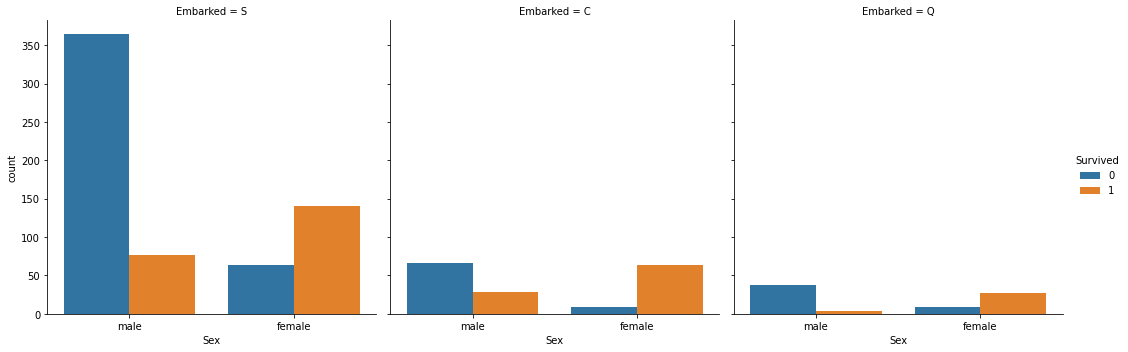

In [109]:
sns.catplot(data=train_df,x="Sex",hue="Survived",col="Embarked",kind="count")
plt.show()

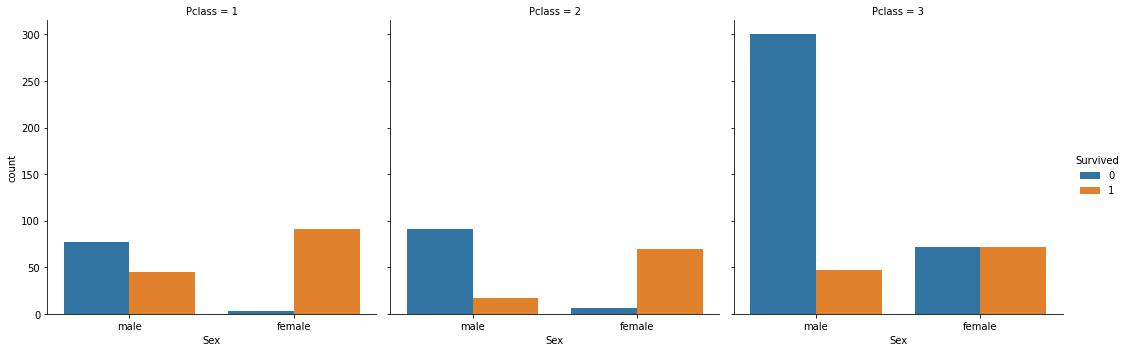

In [110]:
sns.catplot(data=train_df,x="Sex",hue="Survived",col="Pclass",kind="count")
plt.show()

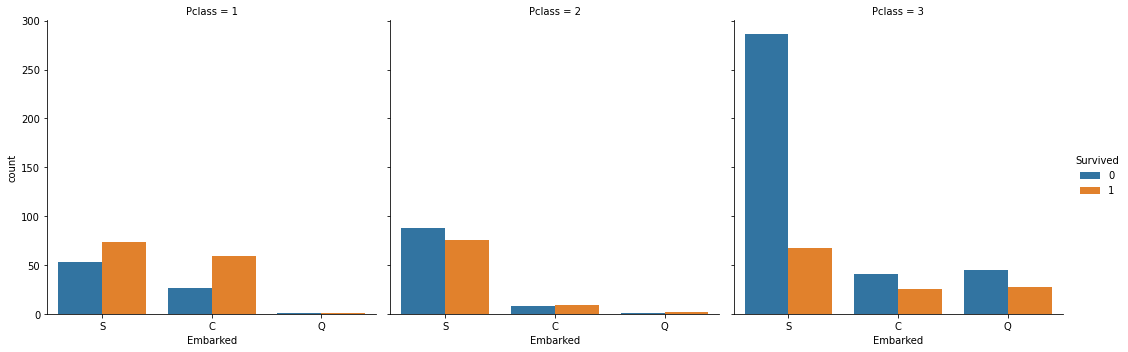

In [111]:
sns.catplot(data=train_df,x="Embarked",hue="Survived",col="Pclass",kind="count")
plt.show()

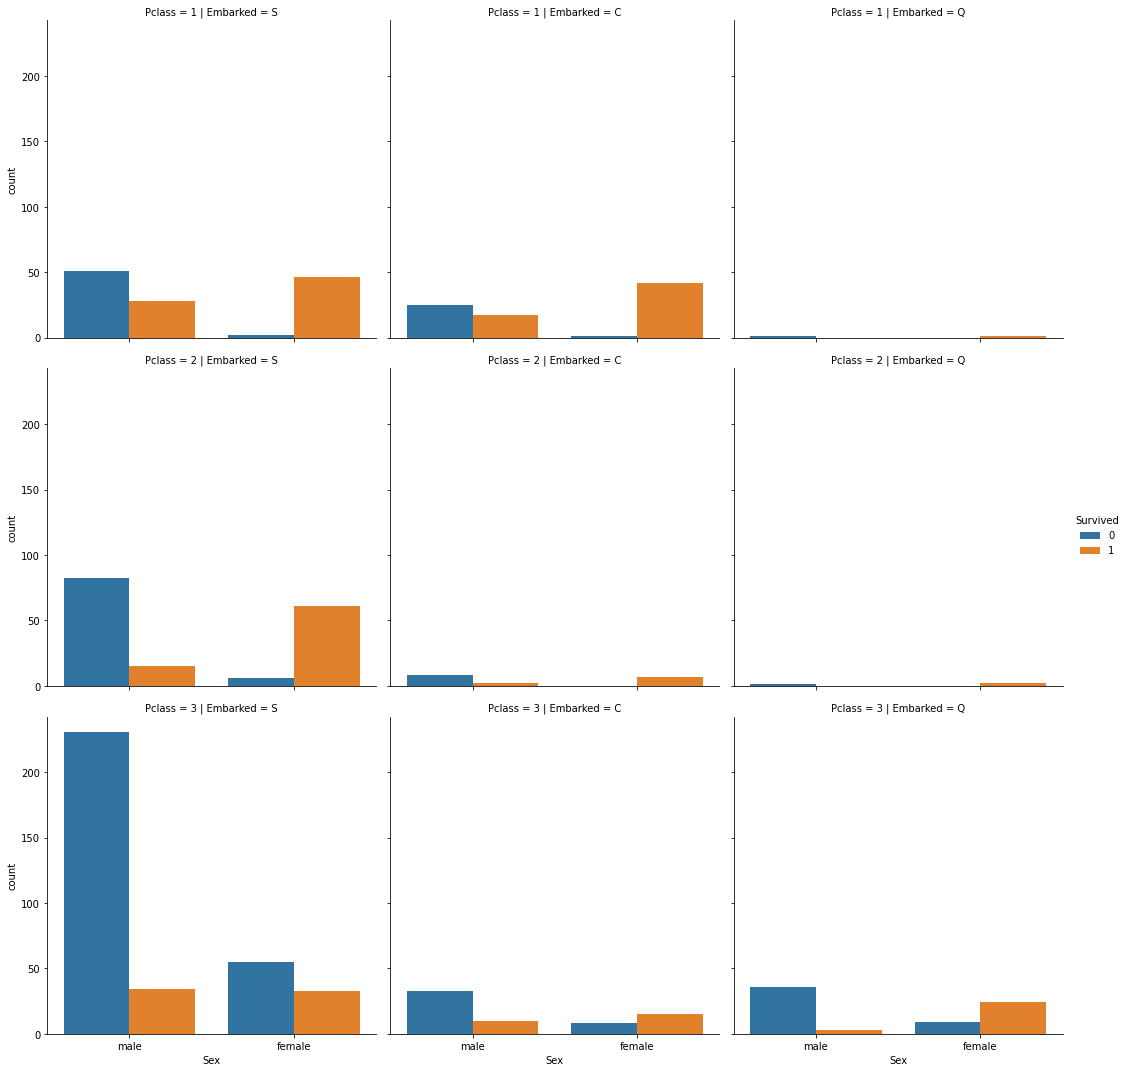

In [112]:
sns.catplot(data=train_df,x="Sex",hue="Survived",col="Embarked",row="Pclass",kind="count")
plt.show()

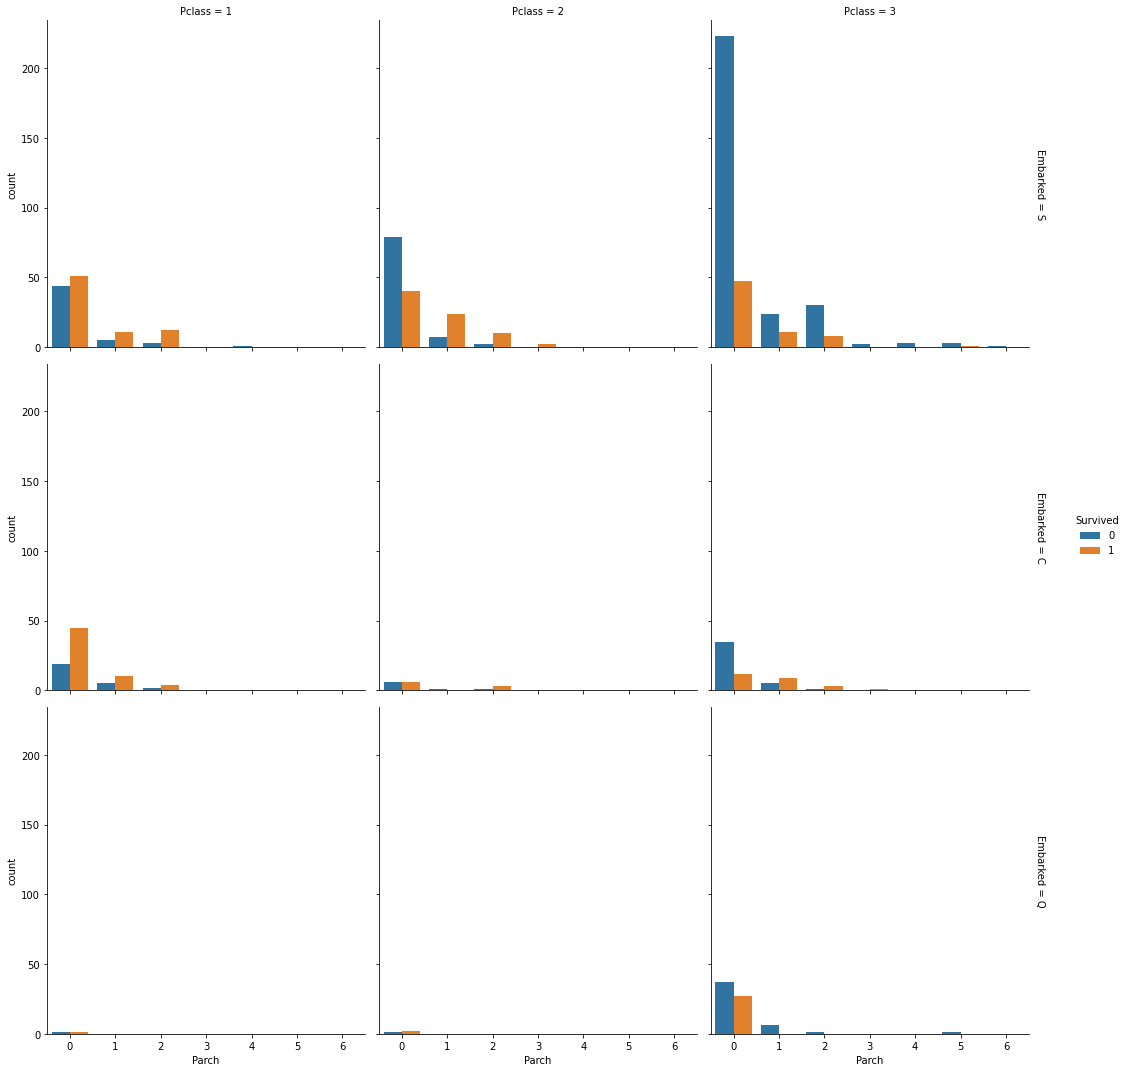

In [118]:
sns.catplot(data=train_df,x="Parch",hue="Survived",col="Pclass",row="Embarked",kind="count",margin_titles=True)
plt.show()

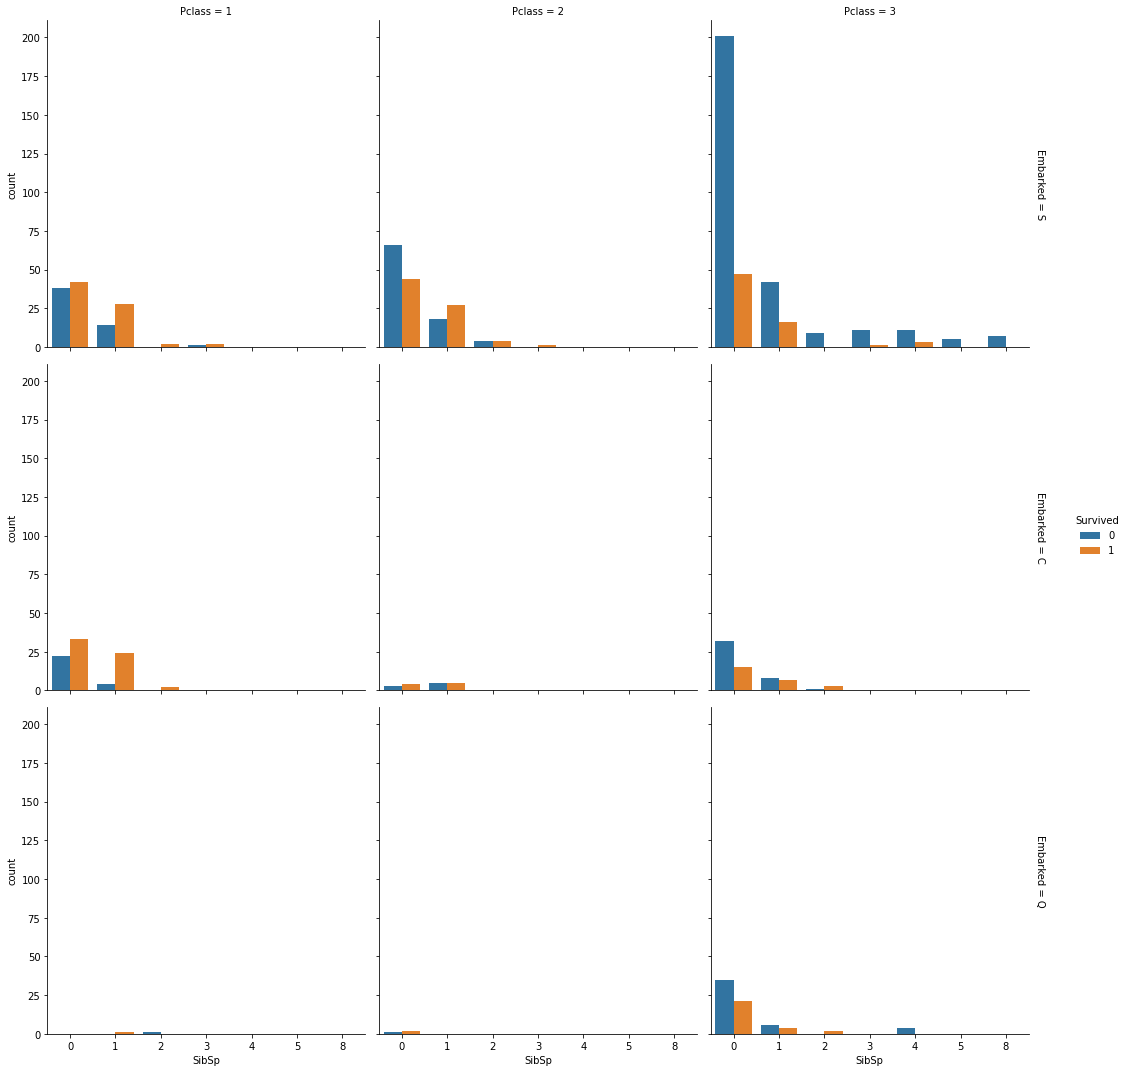

In [119]:
sns.catplot(data=train_df,x="SibSp",hue="Survived",col="Pclass",row="Embarked",kind="count",margin_titles=True)
plt.show()

In [133]:
temp2 = pd.DataFrame(train_df[['Embarked','Sex','Pclass','SibSp','Parch']][train_df['Survived'] == 0].value_counts())

In [134]:
temp2[1] = train_df[['Embarked','Sex','Pclass','SibSp','Parch']][train_df['Survived'] == 1].value_counts()

In [135]:
temp2.rename({0:"Not Survived",1:"Survived"},axis=1,inplace=True)

In [138]:
temp2.sort_values(by=["Embarked"],inplace=True)
temp2.head(40)

Not Survived  Survived
Embarked Sex    Pclass SibSp Parch                        
C        male   2      0     0                 3       1.0
         female 3      0     2                 1       3.0
         male   1      0     2                 2       1.0
                3      2     0                 1       NaN
         female 1      0     0                 1      17.0
         male   2      1     2                 1       NaN
                             1                 1       NaN
         female 3      1     0                 3       2.0
         male   1      1     1                 1       1.0
                             0                 3       5.0
         female 3      1     1                 1       1.0
         male   1      0     0                15       8.0
         female 3      0     0                 1       4.0
         male   3      1     1                 2       3.0
                2      1     0                 3       NaN
                3      0     0                28       5.0
                       1     0                 2       1.0
         female 3      0     1                 2       1.0
         male   1      0     1                 4       2.0
Q        female 3      0     2                 1       NaN
         male   3      1     0                 4       NaN
         female 3      0     5                 1       NaN
                       1     1                 1       NaN
         male   1      2     0                 1       NaN
                3      1     1                 1       NaN
         female 3      0     0                 6      19.0
         male   3      0     0                27       2.0
                       4     1                 4       NaN
                2      0     0                 1       NaN
S        male   3      1     4                 1       NaN
                2      1     2                 1       NaN
                       0     2                 1       1.0
                             1                 1       NaN
                3      0     2                 1       1.0
                2      2     1                 1       1.0
                3      0     0               177      25.0
                       1     3                 1       NaN
         female 3      5     2                 1       NaN
                2      1     1                 1       8.0
                3      0     1                 1       3.0

In [139]:
temp2.fillna(0,inplace=True)
temp2.head(40)

Not Survived  Survived
Embarked Sex    Pclass SibSp Parch                        
C        male   2      0     0                 3       1.0
         female 3      0     2                 1       3.0
         male   1      0     2                 2       1.0
                3      2     0                 1       0.0
         female 1      0     0                 1      17.0
         male   2      1     2                 1       0.0
                             1                 1       0.0
         female 3      1     0                 3       2.0
         male   1      1     1                 1       1.0
                             0                 3       5.0
         female 3      1     1                 1       1.0
         male   1      0     0                15       8.0
         female 3      0     0                 1       4.0
         male   3      1     1                 2       3.0
                2      1     0                 3       0.0
                3      0     0                28       5.0
                       1     0                 2       1.0
         female 3      0     1                 2       1.0
         male   1      0     1                 4       2.0
Q        female 3      0     2                 1       0.0
         male   3      1     0                 4       0.0
         female 3      0     5                 1       0.0
                       1     1                 1       0.0
         male   1      2     0                 1       0.0
                3      1     1                 1       0.0
         female 3      0     0                 6      19.0
         male   3      0     0                27       2.0
                       4     1                 4       0.0
                2      0     0                 1       0.0
S        male   3      1     4                 1       0.0
                2      1     2                 1       0.0
                       0     2                 1       1.0
                             1                 1       0.0
                3      0     2                 1       1.0
                2      2     1                 1       1.0
                3      0     0               177      25.0
                       1     3                 1       0.0
         female 3      5     2                 1       0.0
                2      1     1                 1       8.0
                3      0     1                 1       3.0

In [141]:
temp2['Not Survived(%)'] = temp2['Not Survived']/(temp2['Not Survived']+temp2['Survived'])*100
temp2['Survived(%)'] = temp2['Survived']/(temp2['Not Survived']+temp2['Survived'])*100
temp2.sort_values(by=["Embarked"],inplace=True)
temp2.head(40)

Not Survived  Survived  Not Survived(%)  \
Embarked Sex    Pclass SibSp Parch                                            
C        male   2      0     0                 3       1.0        75.000000   
                1      1     0                 3       5.0        37.500000   
         female 3      0     2                 1       3.0        25.000000   
         male   1      0     2                 2       1.0        66.666667   
                3      2     0                 1       0.0       100.000000   
         female 1      0     0                 1      17.0         5.555556   
         male   2      1     2                 1       0.0       100.000000   
                             1                 1       0.0       100.000000   
                1      1     1                 1       1.0        50.000000   
         female 3      1     0                 3       2.0        60.000000   
                             1                 1       1.0        50.000000   
                       0     0                 1       4.0        20.000000   
         male   3      1     1                 2       3.0        40.000000   
                2      1     0                 3       0.0       100.000000   
                3      0     0                28       5.0        84.848485   
                       1     0                 2       1.0        66.666667   
         female 3      0     1                 2       1.0        66.666667   
         male   1      0     1                 4       2.0        66.666667   
                             0                15       8.0        65.217391   
Q        female 3      0     5                 1       0.0       100.000000   
         male   1      2     0                 1       0.0       100.000000   
         female 3      0     2                 1       0.0       100.000000   
                       1     1                 1       0.0       100.000000   
         male   3      1     0                 4       0.0       100.000000   
                             1                 1       0.0       100.000000   
                       4     1                 4       0.0       100.000000   
                2      0     0                 1       0.0       100.000000   
         female 3      0     0                 6      19.0        24.000000   
         male   3      0     0                27       2.0        93.103448   
S        male   2      1     2                 1       0.0       100.000000   
                       0     2                 1       1.0        50.000000   
                             1                 1       0.0       100.000000   
                3      0     2                 1       1.0        50.000000   
                2      2     1                 1       1.0        50.000000   
                3      0     0               177      25.0        87.623762   
                       1     3                 1       0.0       100.000000   
         female 3      5     2                 1       0.0       100.000000   
                2      1     1                 1       8.0        11.111111   
                3      0     1                 1       3.0        25.000000   
         male   2      1     0                10       1.0        90.909091   

                                    Survived(%)  
Embarked Sex    Pclass SibSp Parch               
C        male   2      0     0        25.000000  
                1      1     0        62.500000  
         female 3      0     2        75.000000  
         male   1      0     2        33.333333  
                3      2     0         0.000000  
         female 1      0     0        94.444444  
         male   2      1     2         0.000000  
                             1         0.000000  
                1      1     1        50.000000  
         female 3      1     0        40.000000  
                             1        50.000000  
                       0     0        80.000000  
         male   3

In [143]:
temp2.sort_values(by=["Survived(%)"],inplace=True,ascending=False)
temp2.head(40)

Not Survived  Survived  Not Survived(%)  \
Embarked Sex    Pclass SibSp Parch                                            
C        female 1      0     0                 1      17.0         5.555556   
S        female 2      0     0                 3      25.0        10.714286   
                       1     1                 1       8.0        11.111111   
C        female 3      0     0                 1       4.0        20.000000   
S        female 2      1     0                 2       7.0        22.222222   
Q        female 3      0     0                 6      19.0        24.000000   
C        female 3      0     2                 1       3.0        25.000000   
S        female 3      0     1                 1       3.0        25.000000   
C        male   1      1     0                 3       5.0        37.500000   
S        male   2      1     1                 4       6.0        40.000000   
C        male   3      1     1                 2       3.0        40.000000   
S        female 3      0     2                 2       3.0        40.000000   
                       1     1                 3       4.0        42.857143   
C        male   1      1     1                 1       1.0        50.000000   
S        male   3      0     2                 1       1.0        50.000000   
                2      2     1                 1       1.0        50.000000   
                       0     2                 1       1.0        50.000000   
         female 3      1     5                 1       1.0        50.000000   
C        female 3      1     1                 1       1.0        50.000000   
S        female 1      1     2                 2       2.0        50.000000   
                3      0     0                16      14.0        53.333333   
C        female 3      1     0                 3       2.0        60.000000   
S        female 3      1     0                 8       5.0        61.538462   
         male   1      1     0                 9       5.0        64.285714   
C        male   1      0     0                15       8.0        65.217391   
S        male   3      0     1                 2       1.0        66.666667   
                1      1     1                 2       1.0        66.666667   
         female 3      4     2                 4       2.0        66.666667   
C        male   1      0     2                 2       1.0        66.666667   
S        male   3      1     1                 6       3.0        66.666667   
C        female 3      0     1                 2       1.0        66.666667   
         male   3      1     0                 2       1.0        66.666667   
S        male   3      4     2                 2       1.0        66.666667   
                       1     2                 2       1.0        66.666667   
C        male   1      0     1                 4       2.0        66.666667   
S        male   1      0     0                35      17.0        67.307692   
C        male   2      0     0                 3       1.0        75.000000   
                3      0     0                28       5.0        84.848485   
S        male   3      0     0               177      25.0        87.623762   
                       1     0                15       2.0        88.235294   

                                    Survived(%)  
Embarked Sex    Pclass SibSp Parch               
C        female 1      0     0        94.444444  
S        female 2      0     0        89.285714  
                       1     1        88.888889  
C        female 3      0     0        80.000000  
S        female 2      1     0        77.777778  
Q        female 3      0     0        76.000000  
C        female 3      0     2        75.000000  
S        female 3      0     1        75.000000  
C        male   1      1     0        62.500000  
S        male   2      1     1        60.000000  
C        male   3      1     1        60.000000  
S        female 3      0     2        60.000000  
                 

In [152]:
temp2.tail(40)

Not Survived  Survived  Not Survived(%)  \
Embarked Sex    Pclass SibSp Parch                                            
Q        male   3      0     0                27       2.0        93.103448   
S        male   3      4     1                 5       0.0       100.000000   
         female 3      0     5                 1       0.0       100.000000   
                             4                 1       0.0       100.000000   
                       8     2                 3       0.0       100.000000   
         male   1      0     1                 3       0.0       100.000000   
                3      5     2                 4       0.0       100.000000   
                1      3     2                 1       0.0       100.000000   
                3      8     2                 4       0.0       100.000000   
         female 3      3     1                 5       0.0       100.000000   
         male   3      1     3                 1       0.0       100.000000   
         female 3      3     2                 2       0.0       100.000000   
         male   3      1     4                 1       0.0       100.000000   
                             5                 1       0.0       100.000000   
                1      1     4                 1       0.0       100.000000   
         female 3      1     6                 1       0.0       100.000000   
                             2                 1       0.0       100.000000   
         male   2      2     0                 3       0.0       100.000000   
         female 3      5     2                 1       0.0       100.000000   
         male   3      2     0                 6       0.0       100.000000   
         female 3      2     0                 1       0.0       100.000000   
                             2                 2       0.0       100.000000   
C        male   2      1     1                 1       0.0       100.000000   
Q        male   1      2     0                 1       0.0       100.000000   
         female 3      0     2                 1       0.0       100.000000   
         male   2      0     0                 1       0.0       100.000000   
C        male   2      1     2                 1       0.0       100.000000   
                3      2     0                 1       0.0       100.000000   
Q        female 3      1     1                 1       0.0       100.000000   
         male   3      1     0                 4       0.0       100.000000   
         female 3      0     5                 1       0.0       100.000000   
S        male   3      3     2                 2       0.0       100.000000   
C        male   2      1     0                 3       0.0       100.000000   
Q        male   3      1     1                 1       0.0       100.000000   
                       4     1                 4       0.0       100.000000   
S        female 3      1     3                 1       0.0       100.000000   
         male   2      1     2                 1       0.0       100.000000   
                       0     1                 1       0.0       100.000000   
                3      3     1                 2       0.0       100.000000   
         female 3      1     4                 1       0.0       100.000000   

                                    Survived(%)  
Embarked Sex    Pclass SibSp Parch               
Q        male   3      0     0         6.896552  
S        male   3      4     1         0.000000  
         female 3      0     5         0.000000  
                             4         0.000000  
                       8     2         0.000000  
         male   1      0     1         0.000000  
                3      5     2         0.000000  
                1      3     2         0.000000  
                3      8     2         0.000000  
         female 3      3     1         0.000000  
         male   3      1     3         0.000000  
         female 3      3     2         0.000000  
         male   3

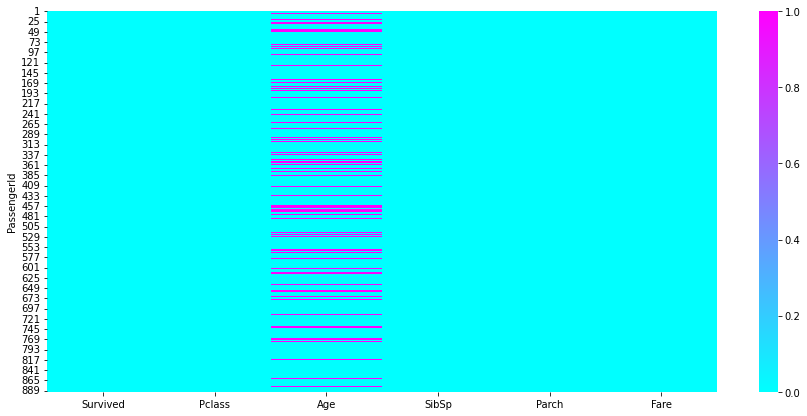

In [163]:
sns.heatmap(train_df[num_col].isnull(),cmap="cool")
plt.show()

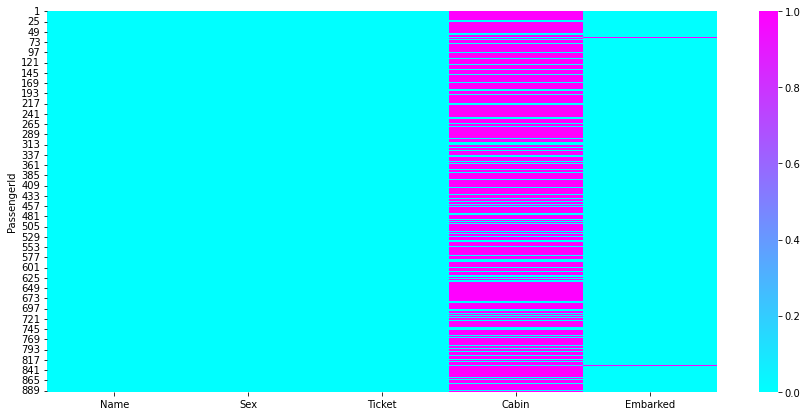

In [164]:
sns.heatmap(train_df[cat_col].isnull(),cmap="cool")
plt.show()

In [165]:
train_df[train_df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [187]:
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0],inplace=True)
train_df["Embarked"].isna().sum()

0

In [192]:
train_df.drop(labels =["Name","Ticket","Cabin"],axis=1,inplace=True)
train_df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C


In [277]:
def fill_missing_Age(dataset):
    mean = dataset["Age"].mean()
    std = dataset["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(mean-std,mean+std,size=is_null)
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice

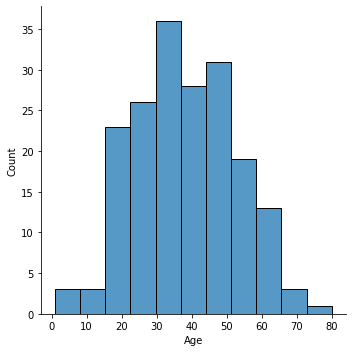

In [260]:
sns.displot(train_df["Age"][train_df["Pclass"] == 1])
plt.show()

In [263]:
t1 = pd.DataFrame(train_df["Age"][train_df["Pclass"] == 1])
t1.isna().sum()

Age    30
dtype: int64

In [268]:
print(f'min : {t1.min()[0]}\nmax : {t1.max()[0]}\nmean : {t1.mean()[0]}\nstd : {t1.std()[0]}\nmedian : {t1.median()[0]}')

min : 0.92
max : 80.0
mean : 38.233440860215055
std : 14.802855896450462
median : 37.0


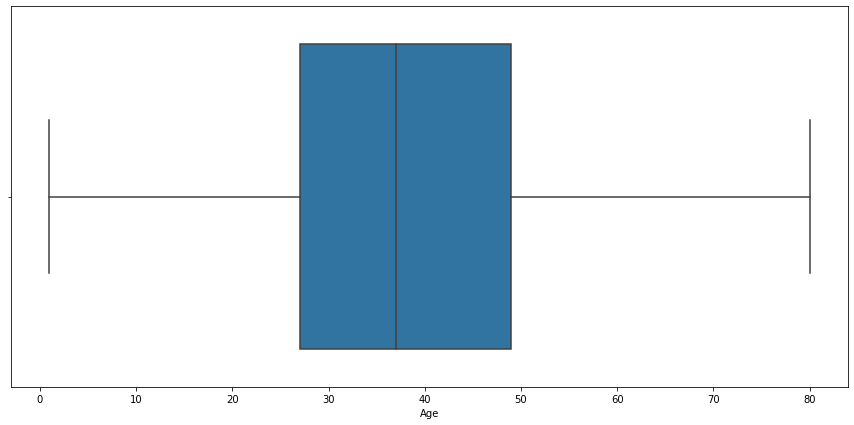

In [272]:
sns.boxplot(data=t1,x="Age")
plt.show()

In [278]:
fill_missing_Age(t1)
t1.isna().sum()

Age    0
dtype: int64

In [280]:
print(f'min : {t1.min()[0]}\nmax : {t1.max()[0]}\nmean : {t1.mean()[0]}\nstd : {t1.std()[0]}\nmedian : {t1.median()[0]}')

min : 0.92
max : 80.0
mean : 38.404722222222226
std : 14.15377270493439
median : 37.5


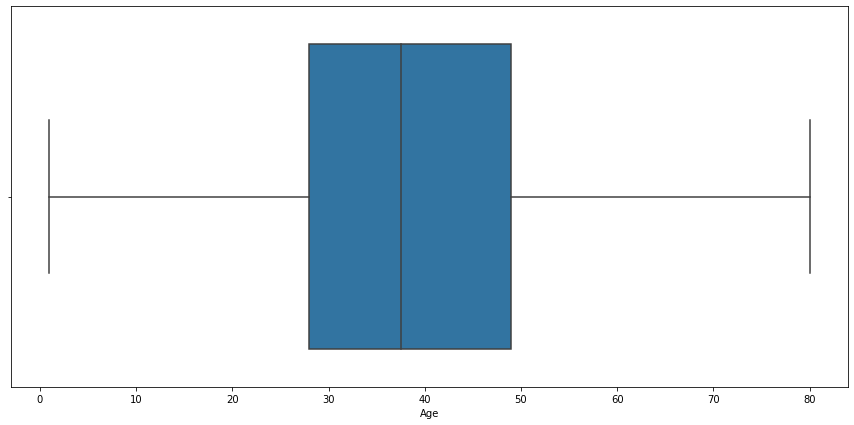

In [279]:
sns.boxplot(data=t1,x="Age")
plt.show()

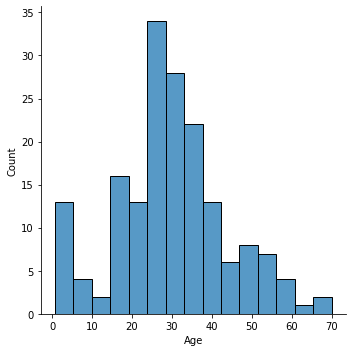

In [261]:
sns.displot(train_df["Age"][train_df["Pclass"] == 2])
plt.show()

In [269]:
t2 = pd.DataFrame(train_df["Age"][train_df["Pclass"] == 2])
t2.isna().sum()

Age    11
dtype: int64

In [270]:
print(f'min : {t2.min()[0]}\nmax : {t2.max()[0]}\nmean : {t2.mean()[0]}\nstd : {t2.std()[0]}\nmedian : {t2.median()[0]}')

min : 0.67
max : 70.0
mean : 29.87763005780347
std : 14.0010768124762
median : 29.0


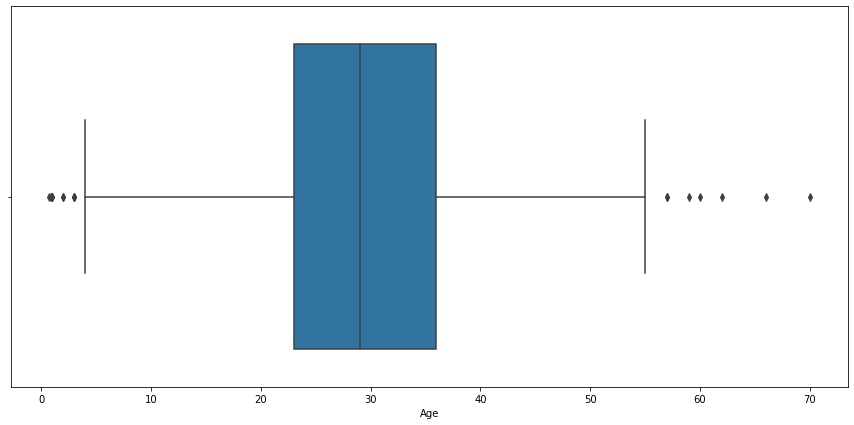

In [273]:
sns.boxplot(data=t2,x="Age")
plt.show()

In [281]:
fill_missing_Age(t2)
t2.isnull().sum()

Age    0
dtype: int64

In [283]:
print(f'min : {t2.min()[0]}\nmax : {t2.max()[0]}\nmean : {t2.mean()[0]}\nstd : {t2.std()[0]}\nmedian : {t2.median()[0]}')

min : 0.67
max : 70.0
mean : 29.78711956521739
std : 13.774816288753353
median : 29.0


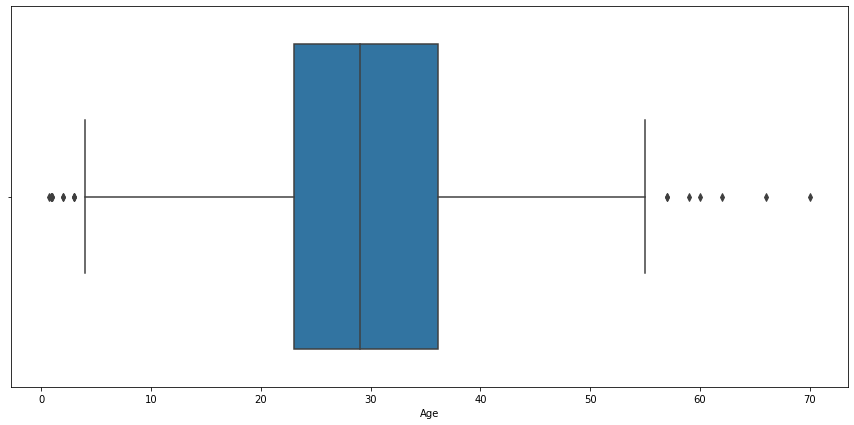

In [282]:
sns.boxplot(data=t2,x="Age")
plt.show()

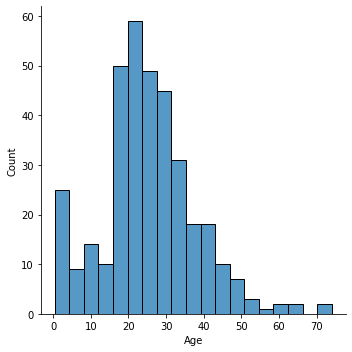

In [262]:
sns.displot(train_df["Age"][train_df["Pclass"] == 3])
plt.show()

In [274]:
t3 = pd.DataFrame(train_df["Age"][train_df["Pclass"] == 3])
t3.isna().sum()

Age    136
dtype: int64

In [275]:
print(f'min : {t3.min()[0]}\nmax : {t3.max()[0]}\nmean : {t3.mean()[0]}\nstd : {t3.std()[0]}\nmedian : {t3.median()[0]}')

min : 0.42
max : 74.0
mean : 25.14061971830986
std : 12.495398210982415
median : 24.0


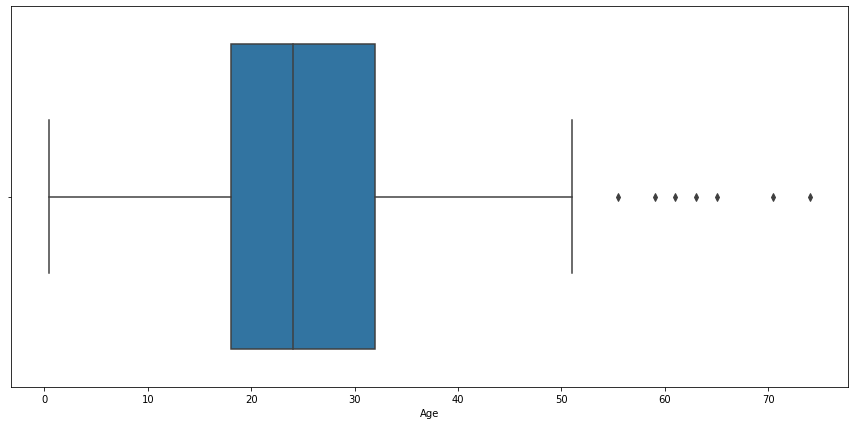

In [276]:
sns.boxplot(data=t3,x="Age")
plt.show()

In [284]:
fill_missing_Age(t3)
t3.isna().sum()

Age    0
dtype: int64

In [285]:
print(f'min : {t3.min()[0]}\nmax : {t3.max()[0]}\nmean : {t3.mean()[0]}\nstd : {t3.std()[0]}\nmedian : {t3.median()[0]}')

min : 0.42
max : 74.0
mean : 24.57824847250509
std : 11.417357453088906
median : 24.0


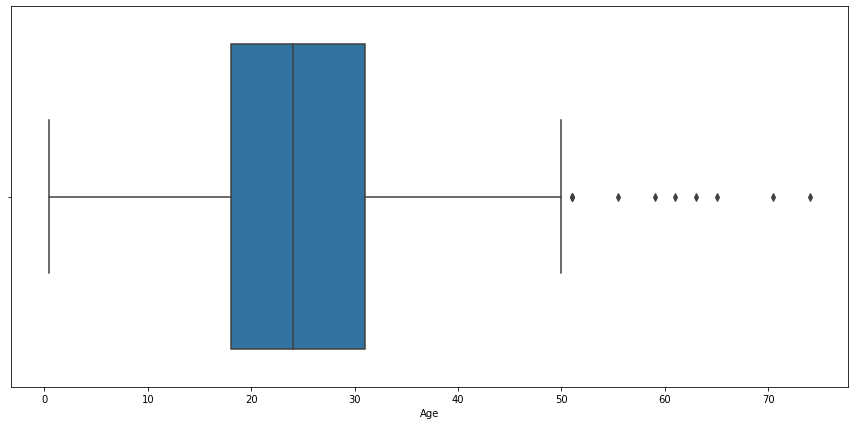

In [286]:
sns.boxplot(data=t3,x="Age")
plt.show()

In [288]:
temp_df = pd.concat([t1,t2,t3])
temp_df.sort_index(inplace=True)
temp_df

,Age
PassengerId,
1,22.0
2,38.0
3,26.0
4,35.0
5,35.0
...,...
887,27.0
888,19.0
889,21.0


In [290]:
train_df["Age"] = temp_df["Age"]
train_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

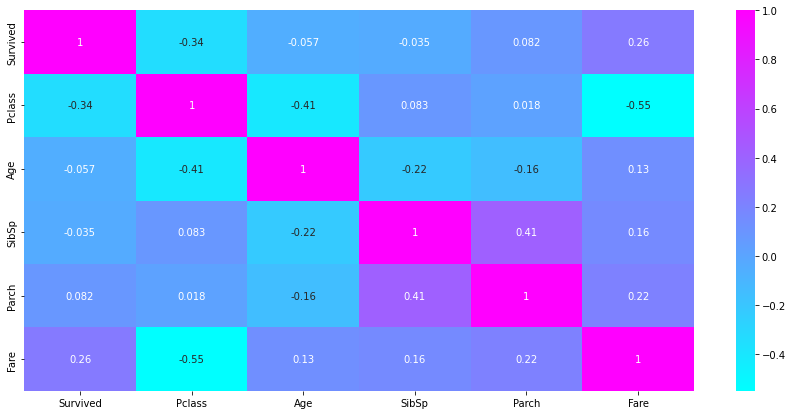

In [293]:
sns.heatmap(train_df.corr(),cmap="cool",annot=True)
plt.show()

In [294]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 94.9+ KB


In [296]:
train_df = pd.get_dummies(train_df,columns=["Sex","Embarked"])
train_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,1,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,0,1,0,0,1
888,1,1,19.0,0,0,30.0000,1,0,0,0,1
889,0,3,21.0,1,2,23.4500,1,0,0,0,1


In [292]:
from sklearn.model_selection import train_test_split

In [308]:
y = train_df['Survived'].copy()
X = train_df.drop('Survived',axis=1).copy()

In [309]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state=31,shuffle=True)

In [305]:
from sklearn.preprocessing import MinMaxScaler

In [306]:
target_scaler = ["Age","Fare"]

In [307]:
scaler = MinMaxScaler()
train_df[target_scaler] = scaler.fit_transform(train_df[target_scaler])
train_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,0.271174,1,0,0.014151,0,1,0,0,1
2,1,1,0.472229,1,0,0.139136,1,0,1,0,0
3,1,3,0.321438,0,0,0.015469,1,0,0,0,1
4,1,1,0.434531,1,0,0.103644,1,0,0,0,1
5,0,3,0.434531,0,0,0.015713,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,0.334004,0,0,0.025374,0,1,0,0,1
888,1,1,0.233476,0,0,0.058556,1,0,0,0,1
889,0,3,0.258608,1,2,0.045771,1,0,0,0,1


## Modelling

logistic Regression
decision tree
random forest 
gradient boost
Navie Bayes
K neighboor
support vector classifier


In [291]:
from sklearn.linear_model import LogisticRegression

In [311]:
lr = LogisticRegression(random_state=31)
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train))
lr_pred = lr.predict(X_val)
print(lr.score(X_val,y_val))

0.812199036918138
0.7947761194029851


In [ ]:
from 